# 보험료 예측 실습
## 1.  데이터 확인 및 분석 프로세스 수집

### 데이터 형식 확인 후 아래 사항 확인  
- 모르는 용어, 전문 용어, 명백하게 필요 없는 항목이 있는지
- 예측/분류/군집 분석 가능한 시나리오가 있는지

데이터 형식 예시  

|age|sex|bmi|children|smoker|region|charges|
|---|---|---|---|---|---|---|
|19|female|27.9|0|yes|southwest|16884.92|
|18|male|33.77|1|no|northwest|1725.552|


### 분석 프로세스 수립

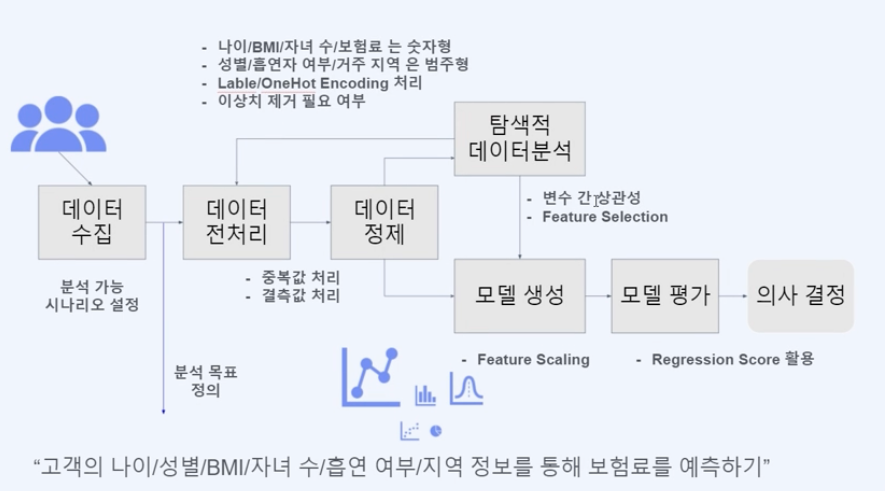

## 2. 데이터 준비

### 2-1. 중복 데이터 타입 처리

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

데이터 준비를 위한 EDA 및 전처리는 아래 사항들을 확인  
- 데이터: 현재 디렉토리의 `ch1_premium.csv`  
- EDA 체크리스트
  1. 어떤 질문을 풀거나 틀렸다고 증명하려고 하는가?  
  2. 중복된 항목은 있는가?
  3. 어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는가?
  4. 데이터에서 누락된 것이 있는지, 있다면 그것들을 어떻게 처리하려는가?
  5. 이상치는 어디에 있는가? 관심을 가져야 할 데이터인가?
  6. 변수 간 상관성이 있는가?


In [2]:
# 데이터 불러오기

data = pd.read_csv("/content/drive/MyDrive/MLStudy/Data_Anaylsis_And_Machine_Learning/02_insurance_fee_prediction/ch1_premium.csv")

목표: 보험사 고객 정보를 통해 보험료 예측 모델을 생성하려고 함  

간략하게 데이터 살피기

In [3]:
# 데이터의 모양 알아보기
data.shape

(1338, 7)

In [4]:
# 데이터의 15개 행 데이터만 확인하기
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


중복된 항목이 있는 지 확인

In [5]:
# 중복된 항목 알아보기
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
# 중복된 항목 수 확인
print(f"중복된 항목 수: {len(data[data.duplicated()])}")

중복된 항목 수: 1


In [7]:
# 중복된 항목 확인
data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# 중복된 항목 제거
data.drop_duplicates(inplace=True, keep="first", ignore_index=True)

In [9]:
# 중복된 항목이 제거되어 이전보다 row 하나 감소
data.shape

(1337, 7)

어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는 지 확인  
> 총 컬럼 수와 컬럼별 데이터 타입 확인  

In [10]:
# 데이터 컬럼 이름/타입 정보 확인

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [12]:
# 데이터 타입별 컬럼 수 확인
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()
dtype_data

,Column Type,Count
0,int64,2
1,float64,2
2,object,3


다음 사항 확인  
- 숫자형 데이터 중 명백하게 포함할 의미가 없는 것은 없는 지
- 범주형 변수는 있는지  

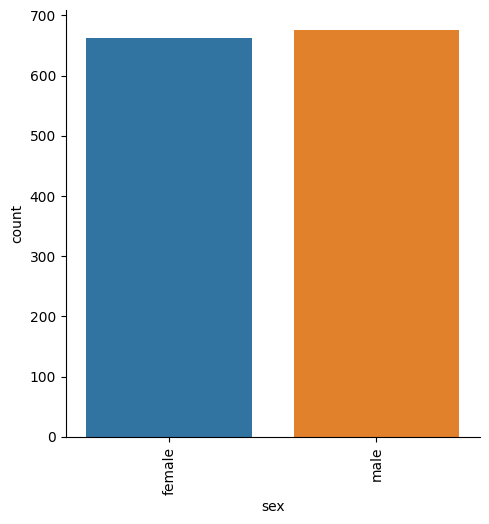

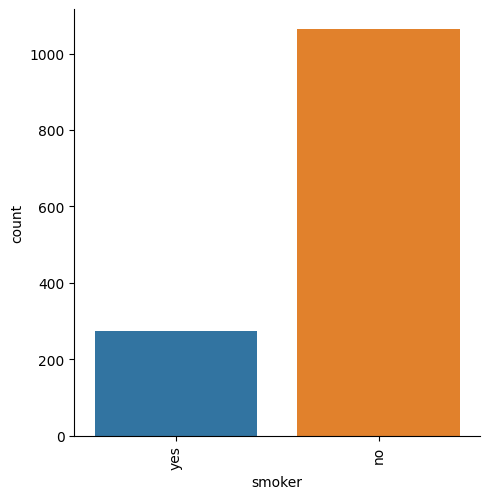

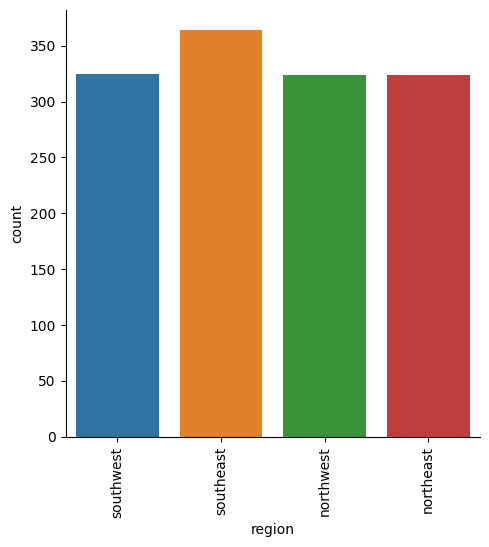

In [13]:
# 범주형 변수별 개수 시각화
for col in data.select_dtypes(include=['object', 'category']).columns:
  fig = sns.catplot(x=col, kind="count", data=data, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

In [14]:
# 데이터 컬럼별 유일한 값 개수 확인하기
data.select_dtypes(include=['object', 'category']).nunique()

sex       2
smoker    2
region    4
dtype: int64

데이터 탐색 결과 항목이 2개인 성별과 흡연 여부는 `LabelEncoder`를, 지역은 `OneHotEncoder`를 사용하기로 함  

### 2-2. 범주형 변수 변환


In [15]:
# sklearn의 LabelEncoder, OneHotEncoder 사용
# LabelEncoder: 각각의 범주를 서로 다른 정수로 맵핑
# 성별, 흡연 여부 컬럼은 Label Encoding을 위해 ndarray로 변환

In [16]:
sex = data.iloc[:, 1:2].values
smoker = data.iloc[:, 4:5].values

In [17]:
sex

array([['female'],
       ['male'],
       ['male'],
       ...,
       ['female'],
       ['female'],
       ['female']], dtype=object)

In [18]:
smoker

array([['yes'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['yes']], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

### 성별  ###
# 1. LabelEncoder() 선언
le = LabelEncoder()

# 2. 성별을 LabelEncoder의 fit_transform에 넣어줌
sex[:, 0] = le.fit_transform(sex[:, 0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
print(sex)

# 3. dict 형으로 변환
print("\nle.classes_:", le.classes_)
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n성별에 대한 Label Encoder 결과: ")
print(le_sex_mapping)
print(sex[:10])

     sex
0      0
1      1
2      1
3      1
4      1
...   ..
1332   1
1333   0
1334   0
1335   0
1336   0

[1337 rows x 1 columns]

le.classes_: ['female' 'male']

성별에 대한 Label Encoder 결과: 
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [20]:
### 흡연 여부 ###
# 1. LabelEncoder() 선언
le = LabelEncoder()

# 2. 흡연 여부를 LabelEncoder의 fit_transform에 넣어줌
smoker[:, 0] = le.fit_transform(smoker[:, 0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
print(smoker)

# 3. dict 형으로 변환해주기
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n흡연 여부에 대한 Label Encoder 결과")
print(le_smoker_mapping)
print(smoker[:10])

     smoker
0         1
1         0
2         0
3         0
4         0
...     ...
1332      0
1333      0
1334      0
1335      0
1336      1

[1337 rows x 1 columns]

흡연 여부에 대한 Label Encoder 결과
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [21]:
# OneHotEncoder: 각각의 범주를 0과 1로 맵핑
## 지역 컬럼은 OneHotEncoding을 위해 ndarray로 변환

In [22]:
from sklearn.preprocessing import OneHotEncoder

region = data.iloc[:, 5:6].values

### 지역 ###
# 1. OneHotEncoder() 선언
ohe = OneHotEncoder()

# 2. 지역을 OneHotEncoder의 fit_transform에 넣어줌
region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("지역에 대한 OneHotEncoder 결과")
print(region[:10])

지역에 대한 OneHotEncoder 결과
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


### 2-3 데이터 결측값 처리

> NULL 값이 포함된 컬럼 찾기 -> 각 컬럼의 평균값으로 채우기 (Imputation 또는 보간법)

bmi    5
dtype: int64


<Axes: >

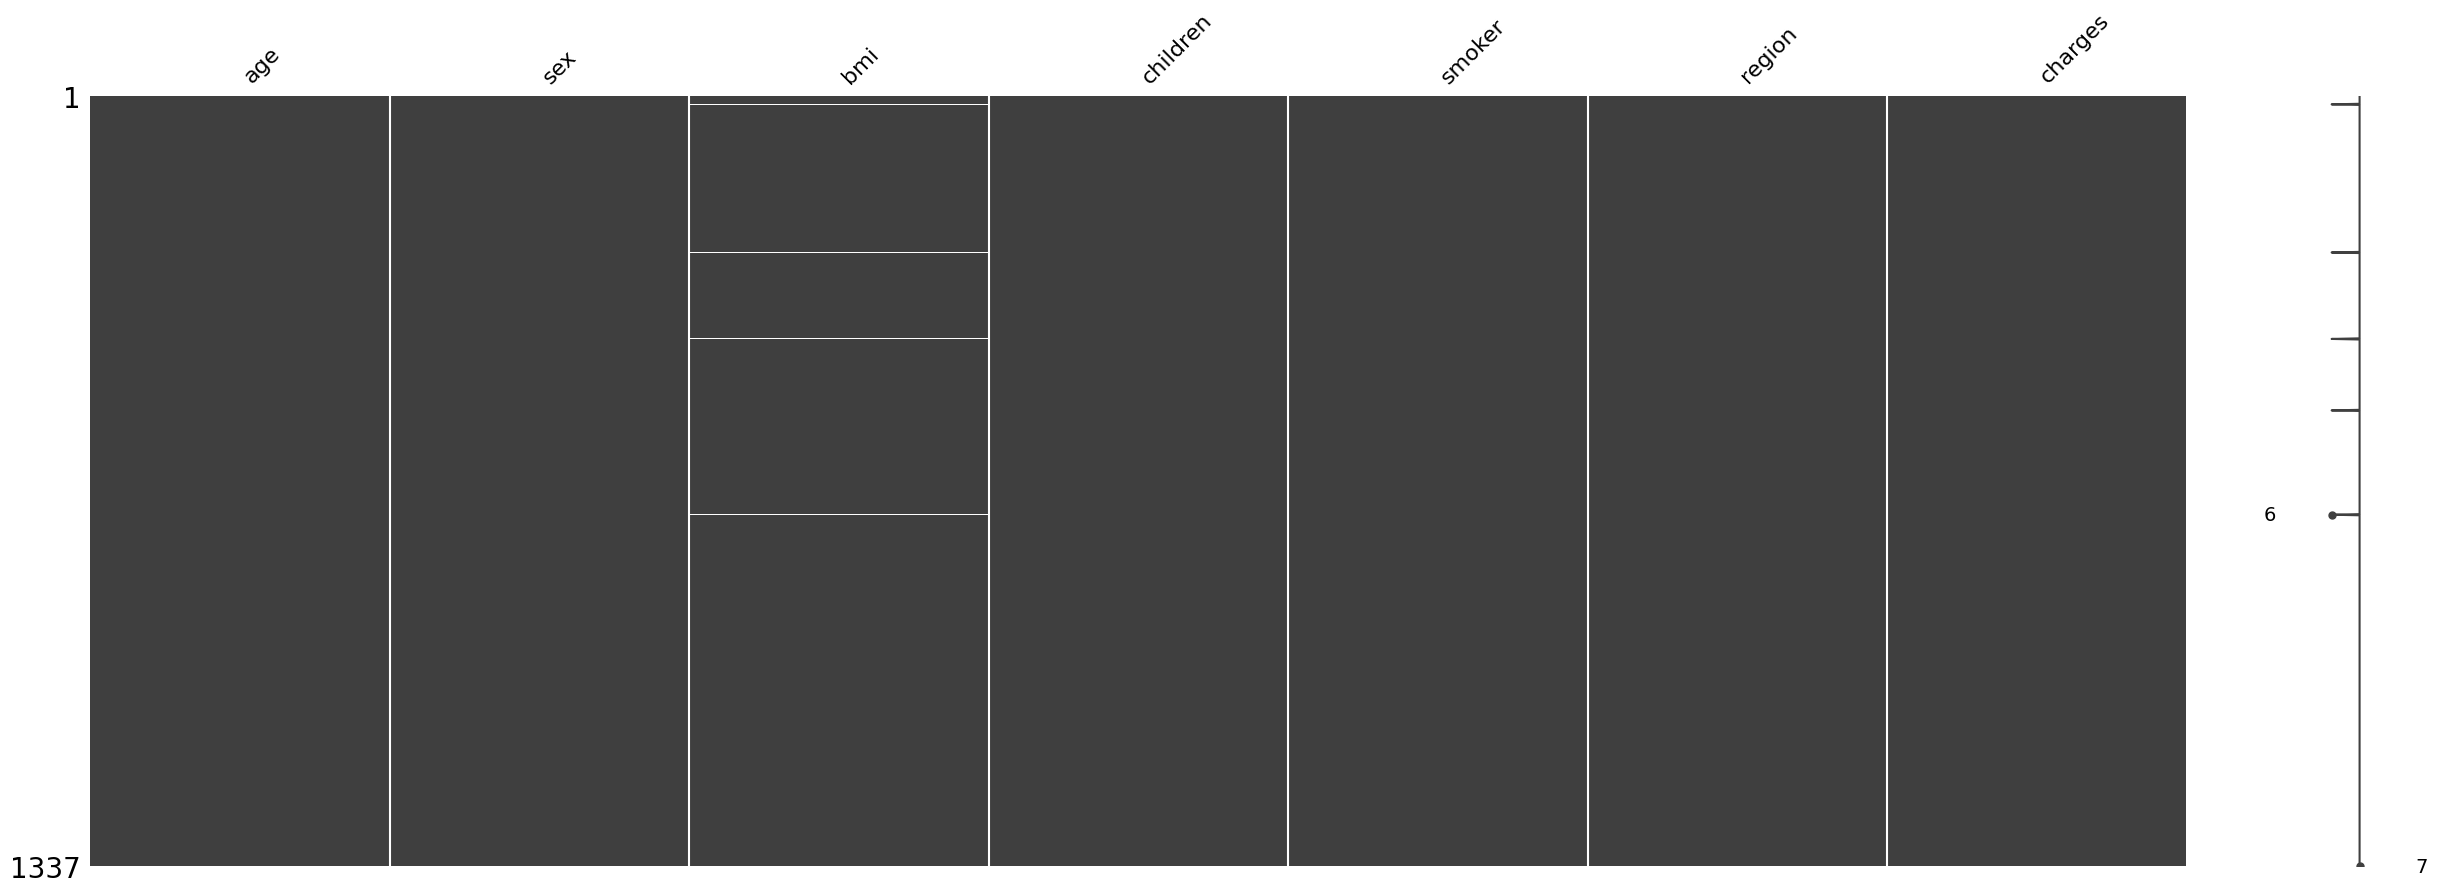

In [23]:
# 각 컬럼들에 몇 개의 NULL 값이 포함되어 있는지 확인
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

# missingno 패키지를 통해 시각화 확인
missingno.matrix(data, figsize=(30, 10))

<Axes: >

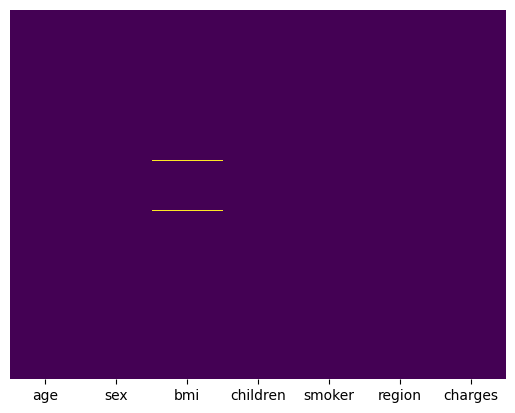

In [24]:
# seaborn 패키지 heatmap을 통해 시각화 확인
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

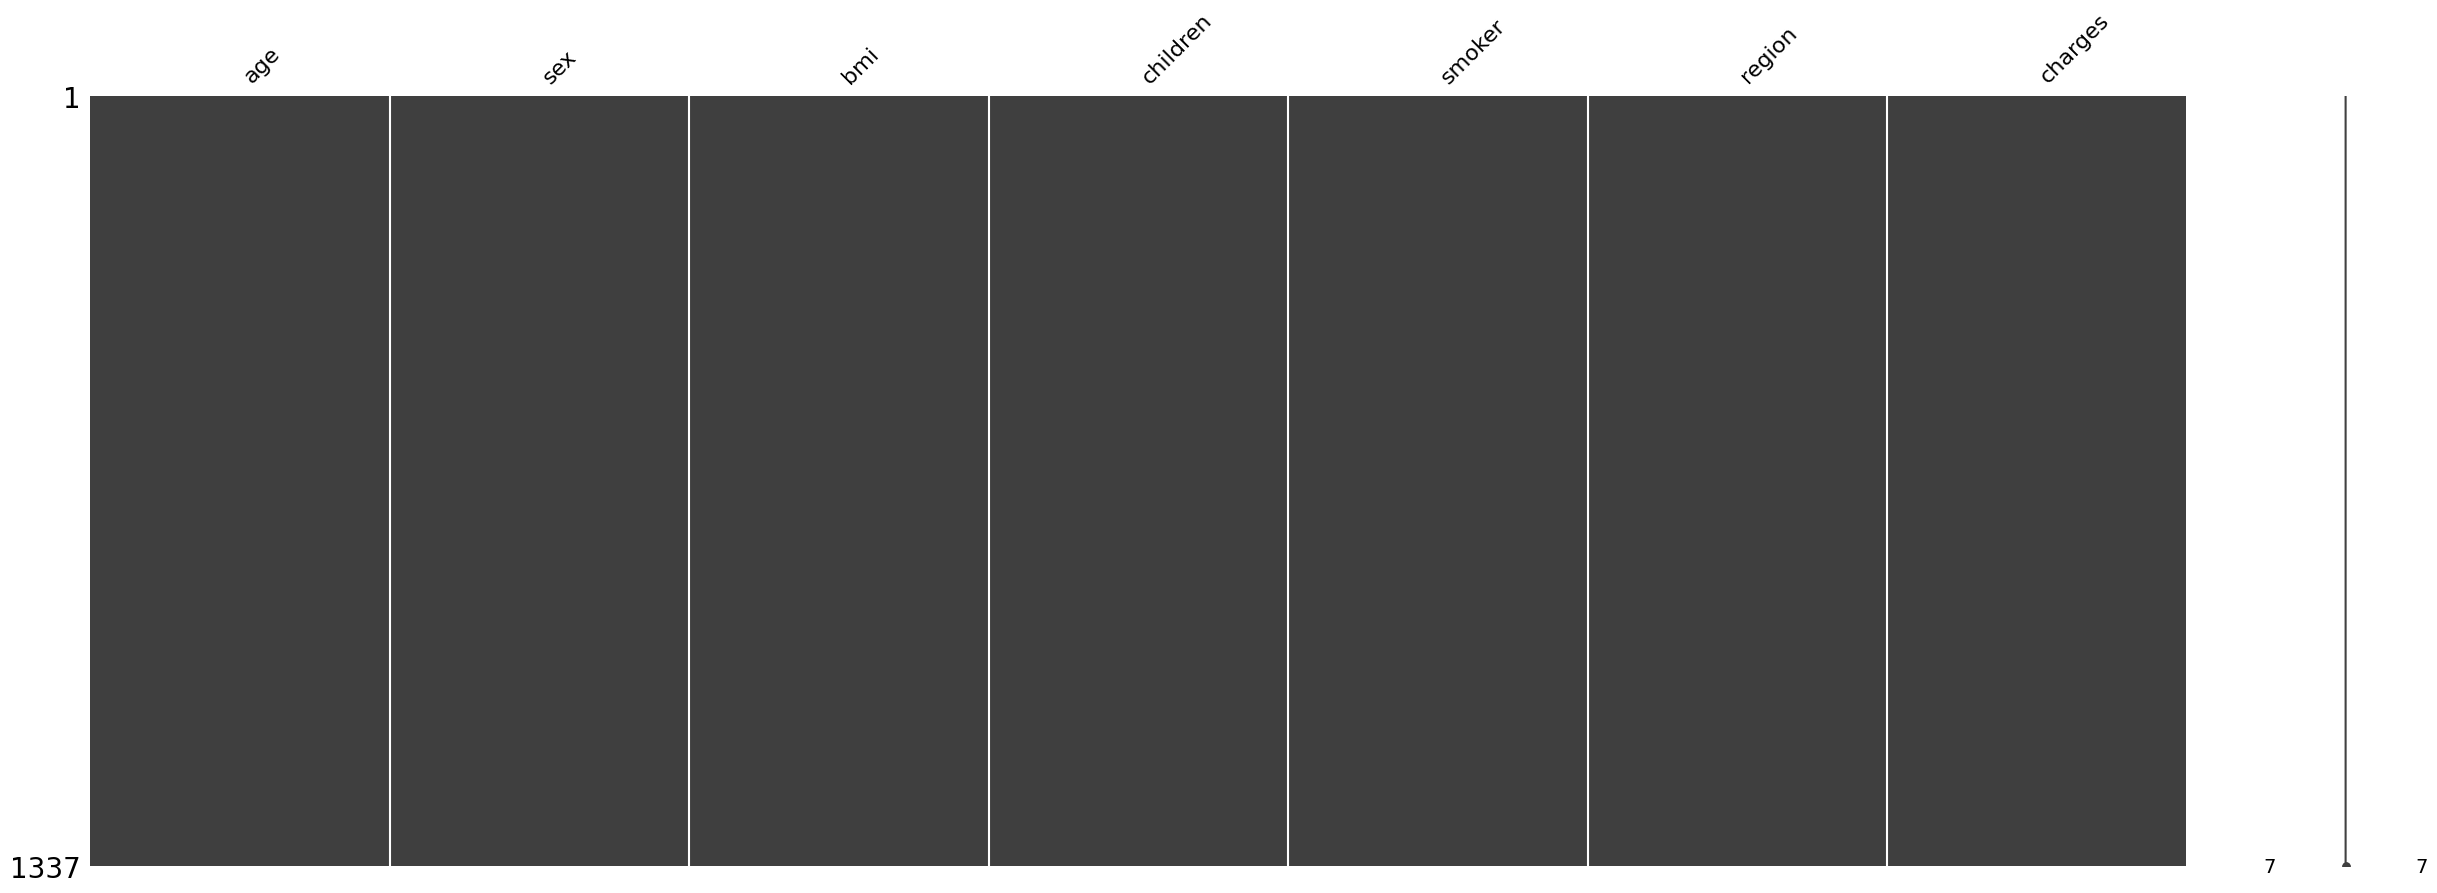

In [25]:
# NULL 값을 해당 컬럼의 평균값으로 대체하기
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# 확인
count_nan = data.isnull().sum()
print(count_nan)

# missingno 패키지를 통해 시각화 재확인
missingno.matrix(data, figsize=(30, 10))

### 2-4 이상치 데이터 처리

> 숫자형 데이터별 요약 통계값 확인

In [26]:
# 데이터 컬럼별 요약 통계값 보기
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.658596,6.083657,15.9600,26.315,30.4000,34.60000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<Axes: ylabel='Frequency'>

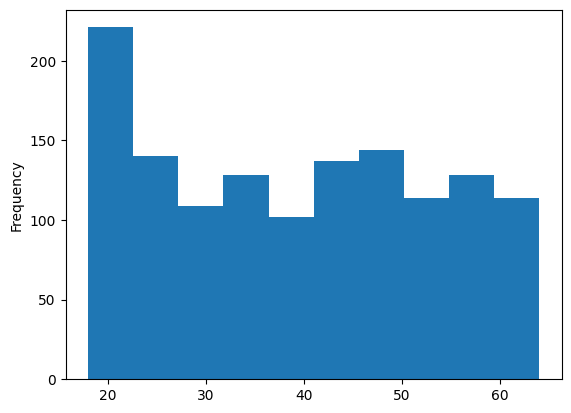

In [27]:
# 데이터 개별 컬럼 히스토그램으로 확인
data.age.plot.hist()

> 숫자형 데이터 skewness 확인

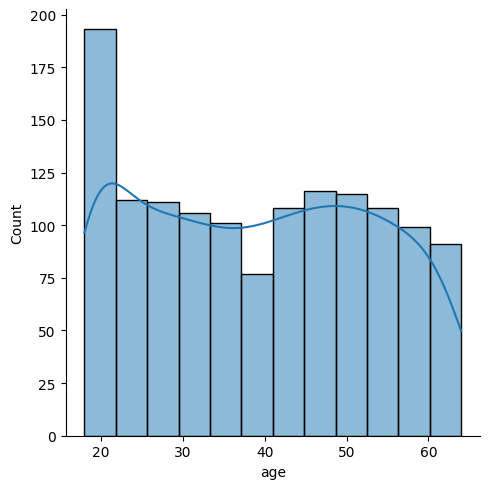

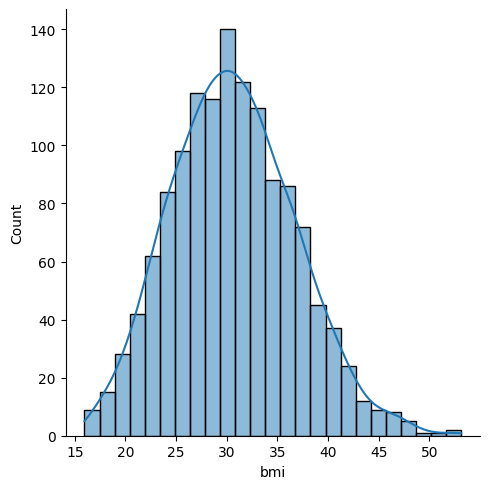

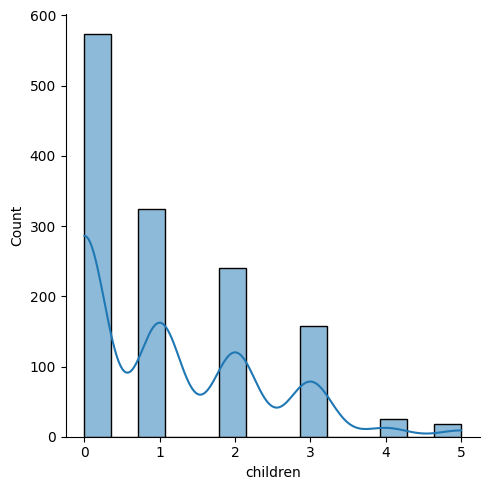

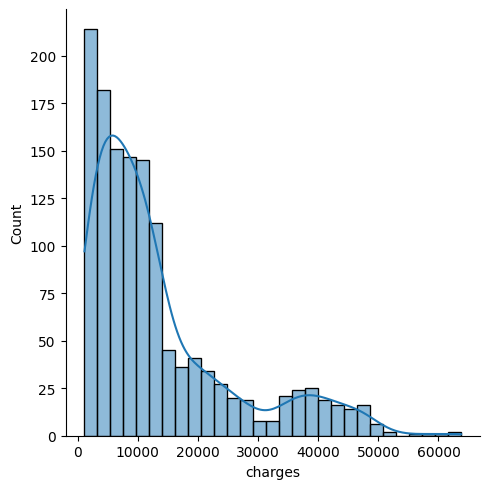

In [28]:
# 데이터 컬럼 타입이 np.number인 것만 가져오기
numeric_data = data.select_dtypes(include=np.number)

# 데이터 컬럼 타입이 np.number인 컬럼 이름들 가져오기
columns = numeric_data.columns.values
number_of_columns = 4
number_of_rows = int(len(columns)-1 / number_of_columns)

# 컬럼별 히스토그램 그리기
for column in columns:
  sns.displot(numeric_data[column], kde=True)


> 숫자형 데이터 Box Plot 시각화

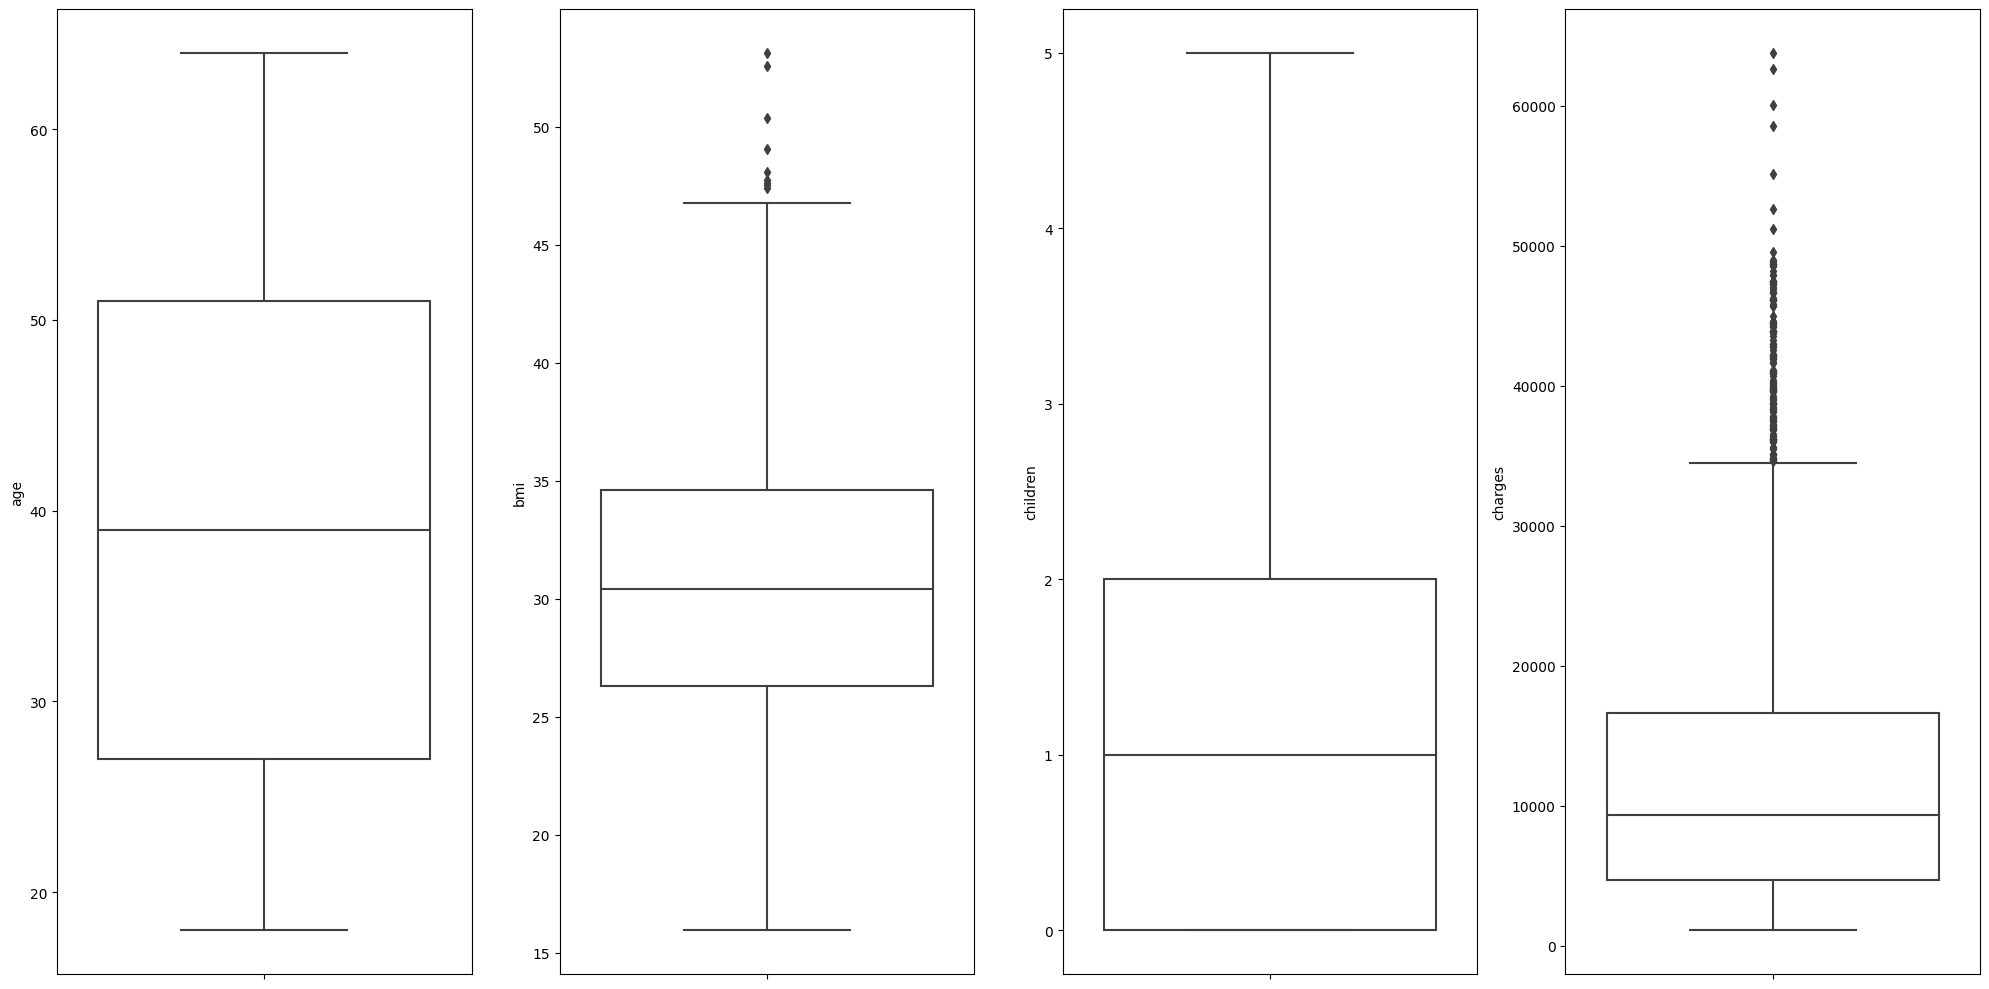

In [29]:
# 데이터 컬럼 타입이 np.number인 컬럼들 가져오기
columns = data.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
  if index > 0:
    figure.add_subplot(1, len(columns), index + 1)
  sns.boxplot(y=col, data=data, boxprops={'facecolor': 'None'})
figure.tight_layout()
plt.show()

# boxplot의 양 끝 가로선을 벗어나는 데이터들이 이상치

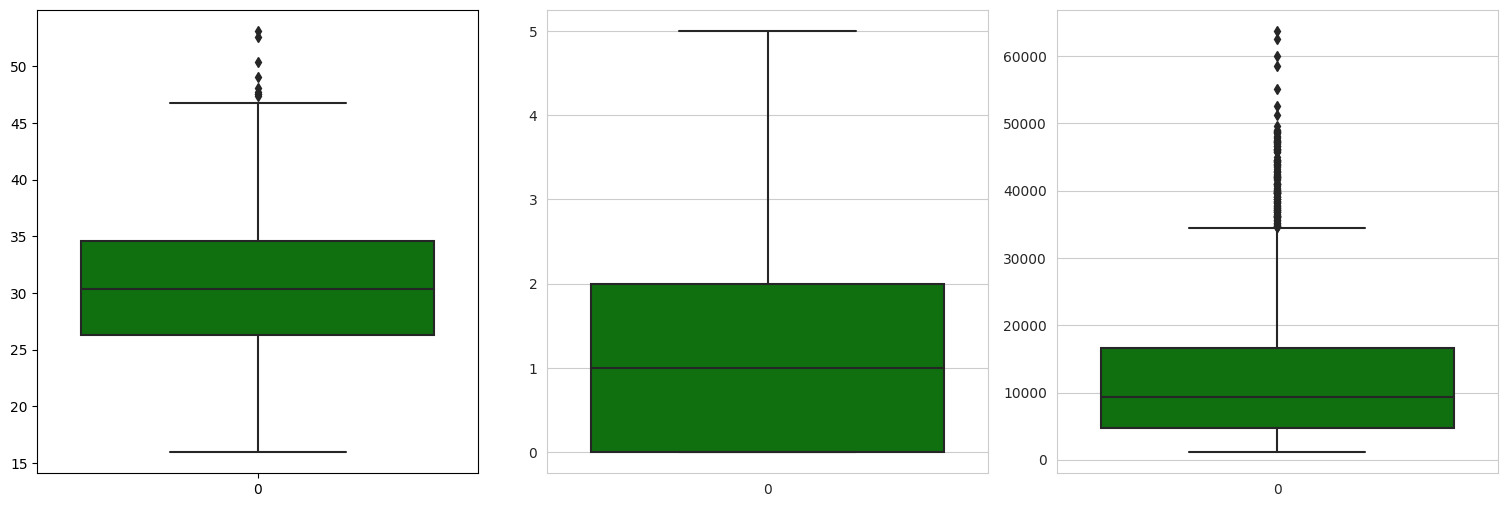

In [30]:
plt.figure(figsize=(20,20))
for i in range(1, len(columns)):
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
  sns.set_style('whitegrid')
  sns.boxplot(numeric_data[columns[i]], color='green', orient='v')
  plt.tight_layout()

> 범주형 데이터별 Violin Plot 시각화

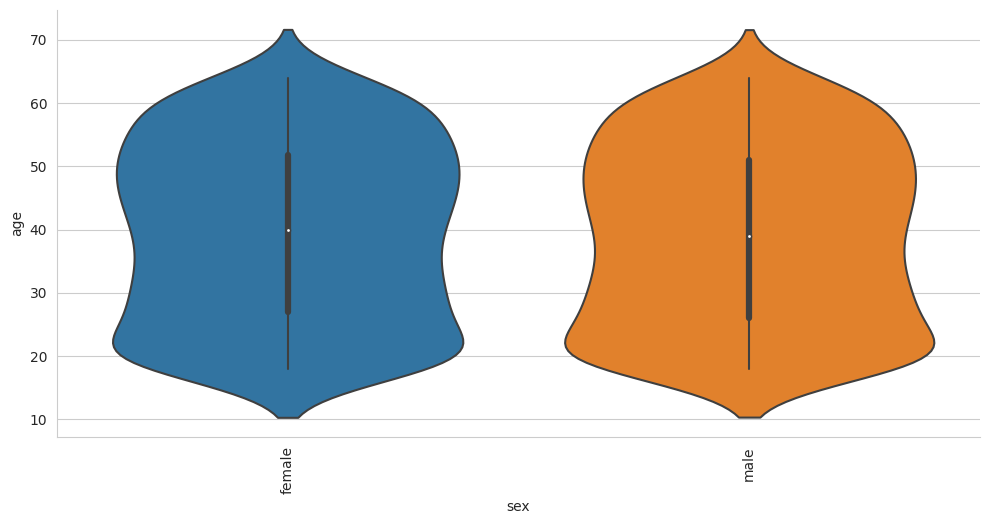

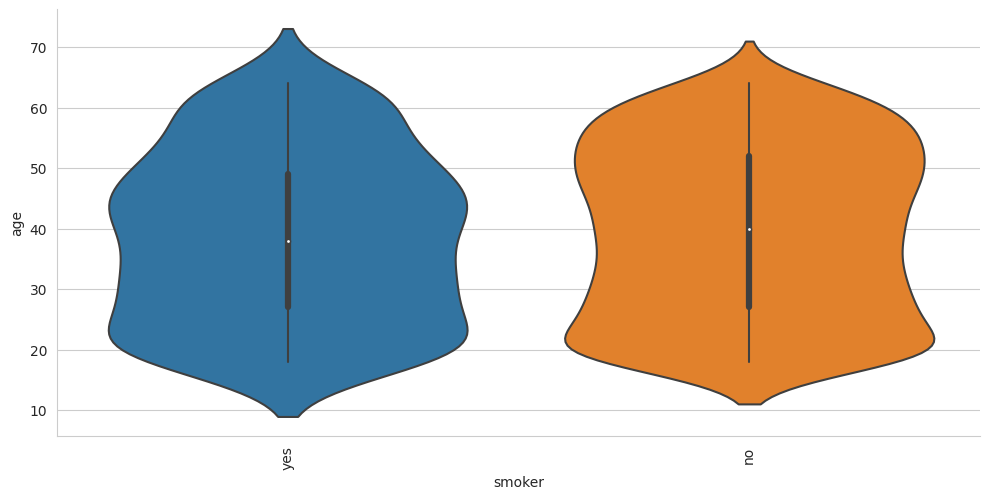

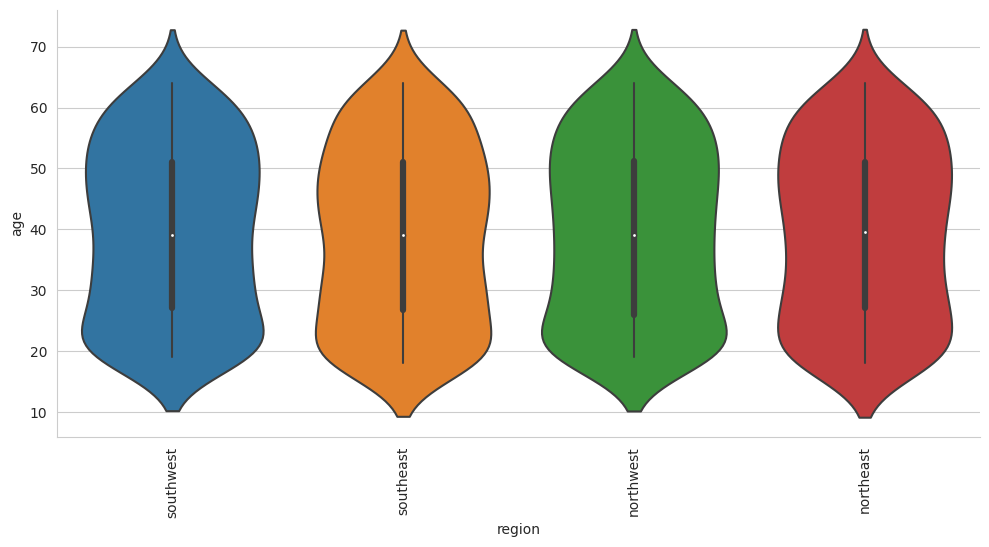

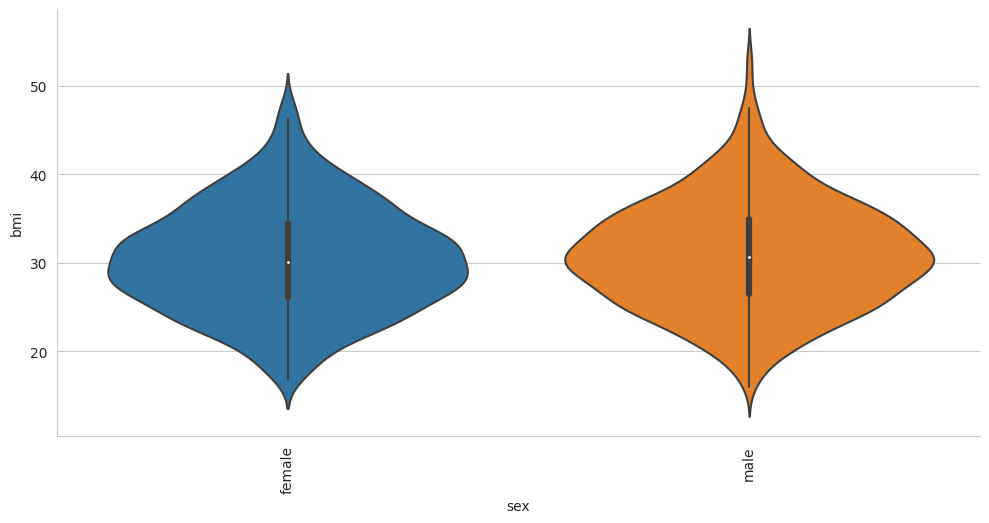

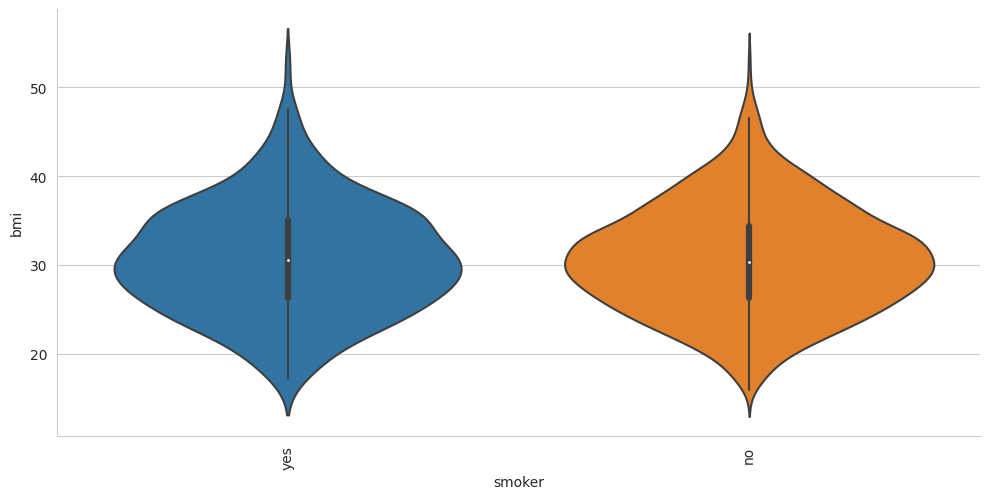

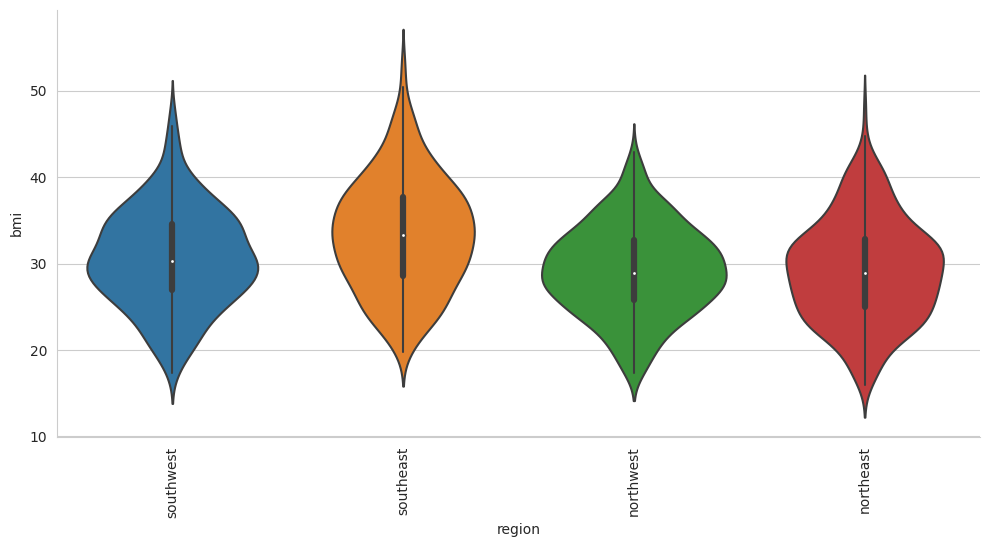

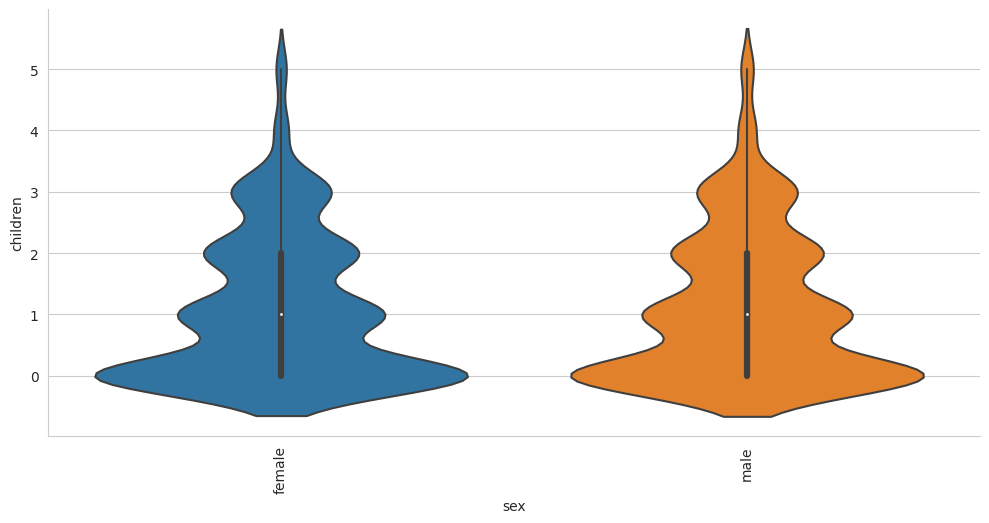

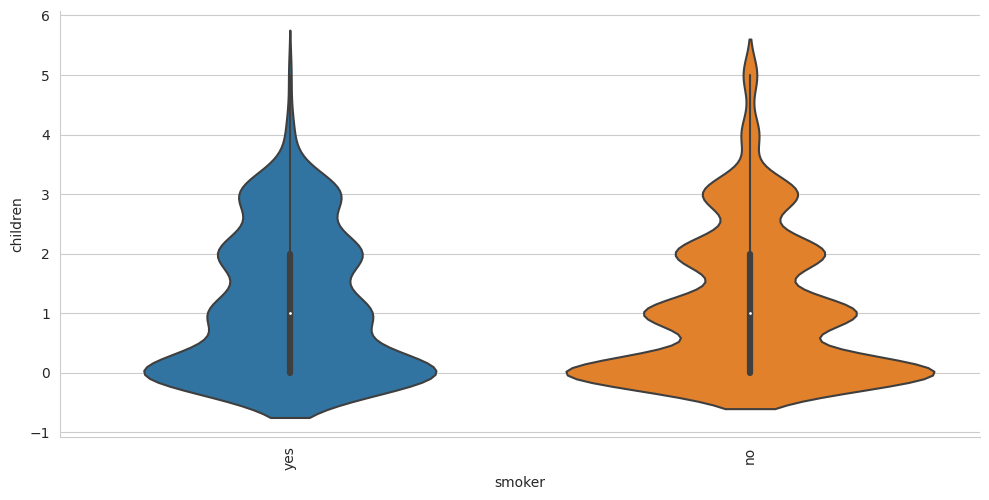

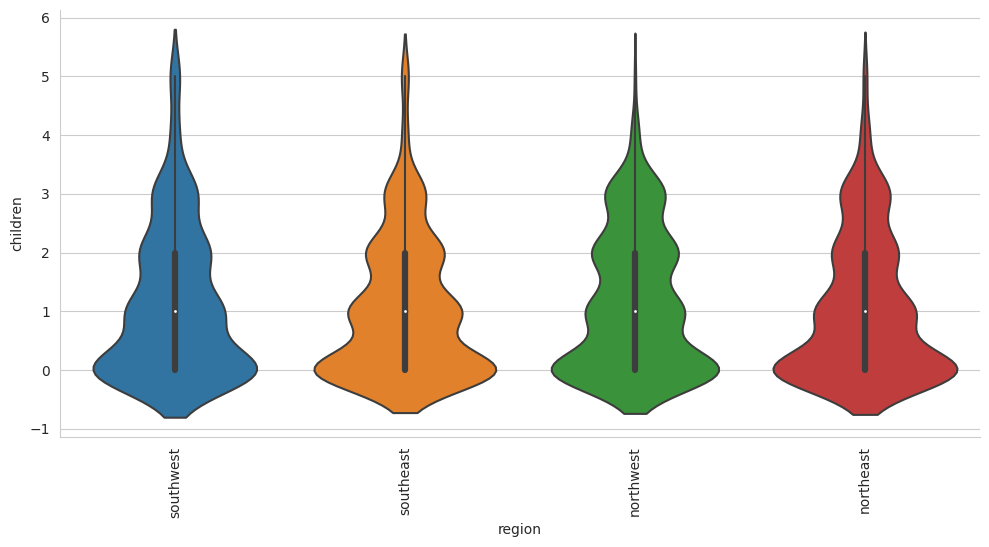

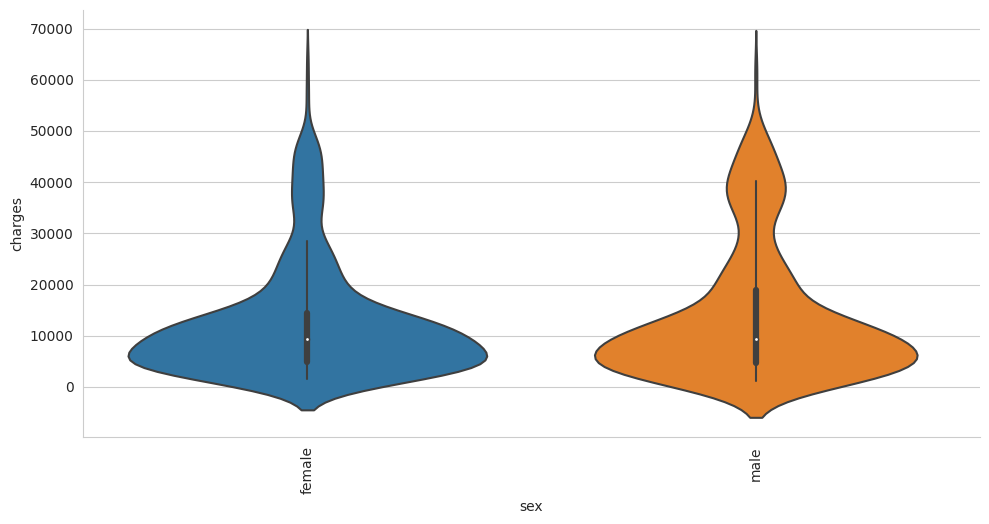

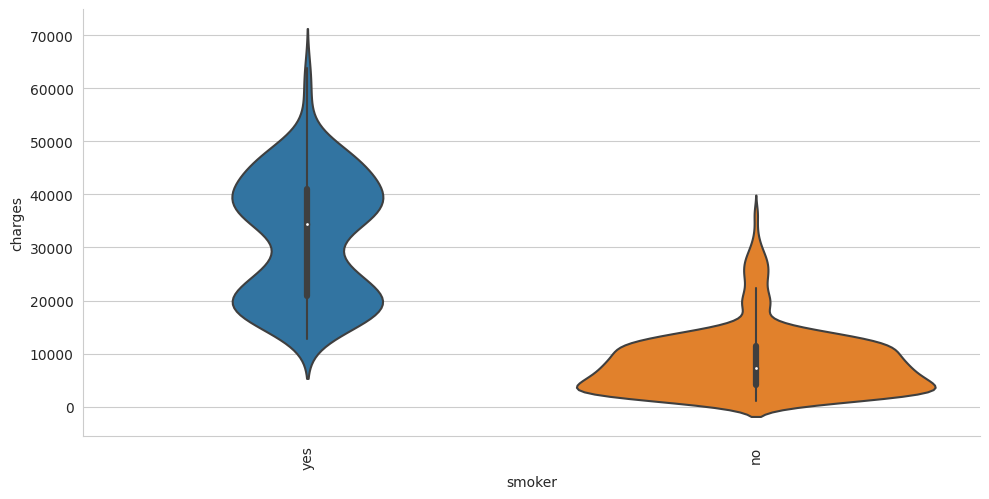

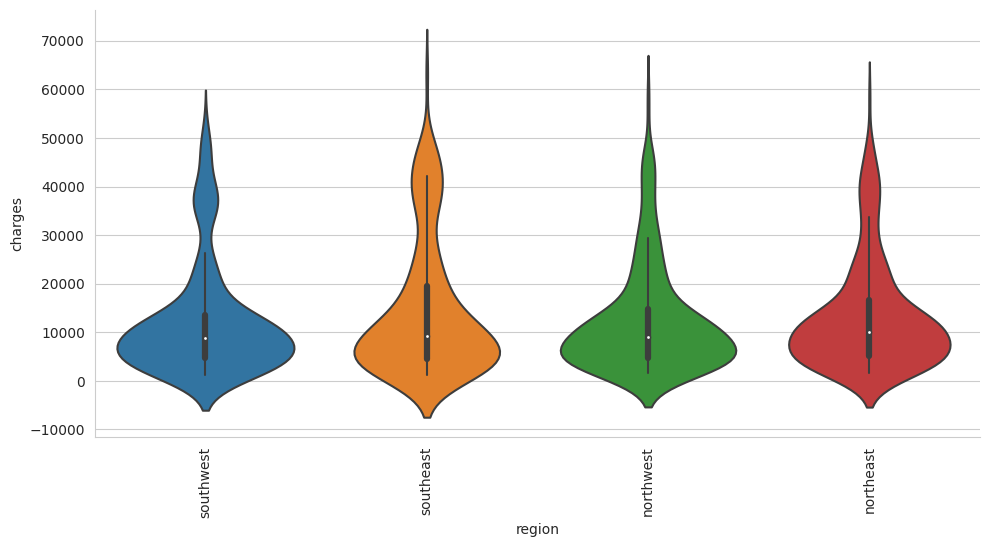

In [31]:
if len(data.select_dtypes(include=['object', 'category']).columns) > 0:
  for col_num in data.select_dtypes(include=np.number).columns:
    for col in data.select_dtypes(include=['object', 'category']).columns:
      fig = sns.catplot(x=col, y=col_num, kind='violin', data=data, height=5, aspect=2)
      fig.set_xticklabels(rotation=90)
      plt.show()

### 2-5 변수간 상관성 확인  
> 숫자형 데이터칸 Pairwise 결합 분포 시각화

<ipython-input-32-c6e40edf5e53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=False)


<Axes: >

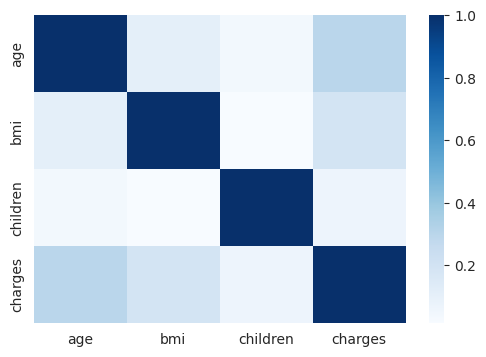

In [32]:
# Seaborn Heatmap을 사용한 Correlation 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), cmap='Blues', annot=False)

<ipython-input-33-1260ef269be9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = data.corr().nlargest(k, 'charges')['charges'].index


<Axes: >

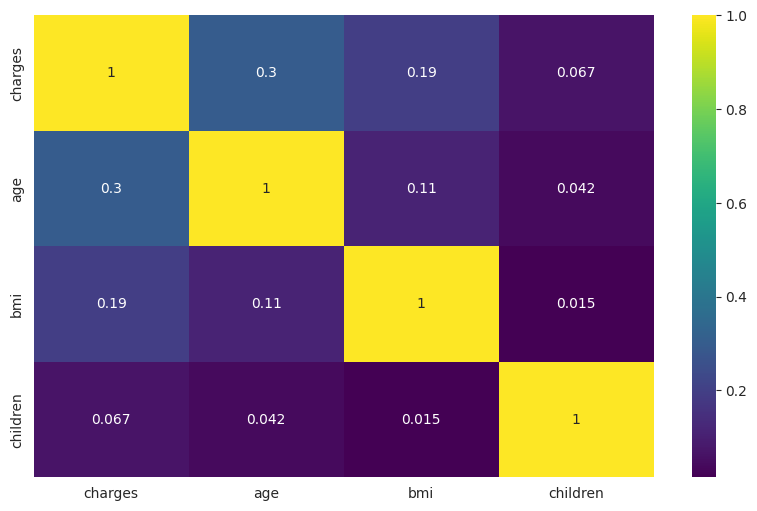

In [33]:
# 보험료 Correlation Matrix 시각화
k = 4   # Heatmap에서 확인한 변수 개수
cols = data.corr().nlargest(k, 'charges')['charges'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

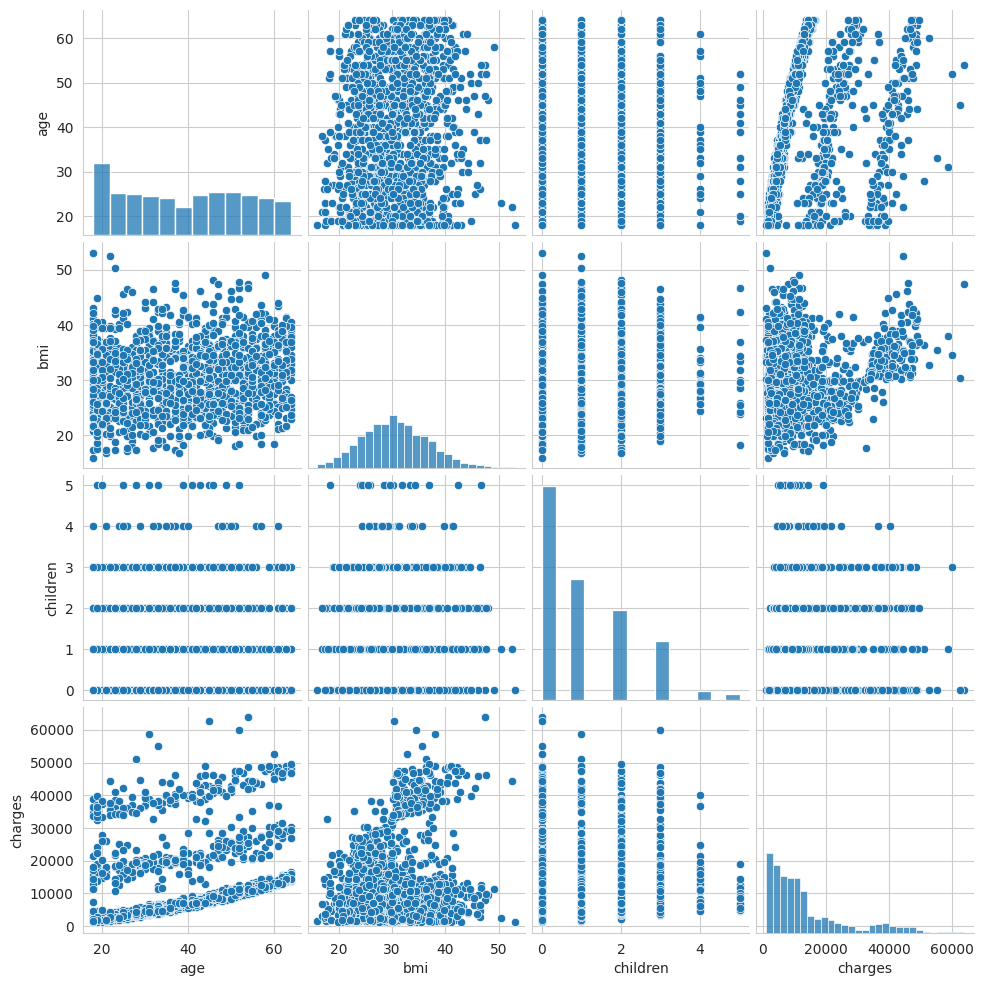

In [34]:
# 숫자 변수형 컬럼들 간 Pairplot 그리기
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

> 범주형 데이터를 기준으로 추가한 시각화

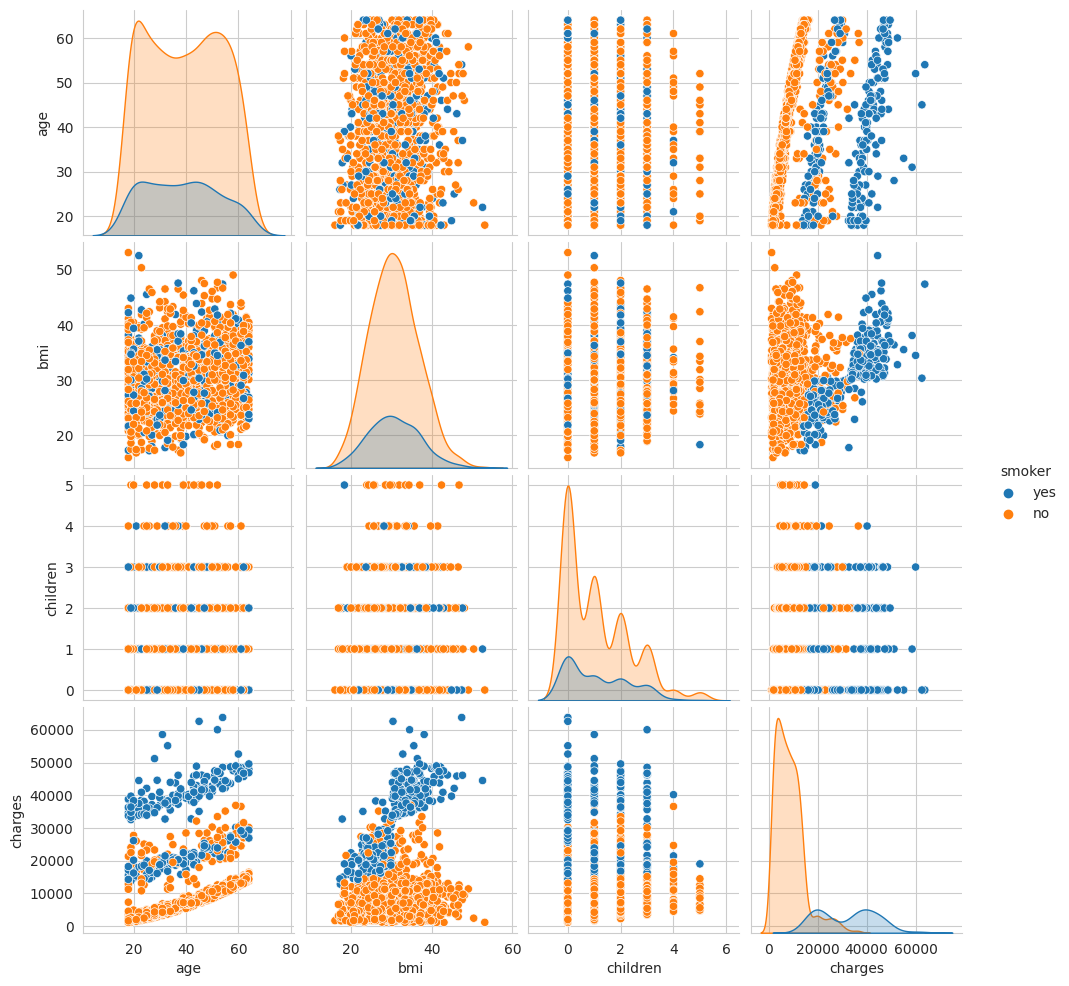

In [35]:
hue = 'smoker'
sns.pairplot(data.select_dtypes(include=np.number).join(data[[hue]]), hue=hue)
plt.show()

## 3. 다양한 Regression을 활용한 보험료 예측
### 3-1 Training, Test 데이터 나누기

In [36]:
# 숫자형 데이터들만 copy()를 사용하여 복사
X_num = data[['age', 'bmi', 'children']].copy()

# 변환했던 범주형 데이터들과 concat을 사용하여 합치기
X_final = pd.concat([X_num, region, sex, smoker], axis=1)

# 보험료 컬럼(charges)을 y값으로 설정
y_final = data[['charges']].copy()

# train_test_split을 사용하여 Training, Test 나누가 (Training, Test = 2:1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

In [37]:
X_train[0:10]

,age,bmi,children,northeast,northwest,southeast,southwest,sex,smoker
905,27,32.585,3,1.0,0.0,0.0,0.0,1,0
2,28,33.000,3,0.0,0.0,1.0,0.0,1,0
405,52,38.380,2,1.0,0.0,0.0,0.0,0,0
481,49,37.510,2,0.0,0.0,1.0,0.0,1,0
338,50,32.300,1,1.0,0.0,0.0,0.0,1,1
356,46,43.890,3,0.0,0.0,1.0,0.0,1,0
1258,52,23.180,0,1.0,0.0,0.0,0.0,0,0
182,22,19.950,3,1.0,0.0,0.0,0.0,1,0
461,42,30.000,0,0.0,0.0,0.0,1.0,1,1
1058,32,33.820,1,0.0,1.0,0.0,0.0,1,0


In [38]:
y_test[0:10]

,charges
1247,1633.96180
609,8547.69130
393,9290.13950
503,32548.34050
198,9644.25250
820,2680.94930
31,2198.18985
1250,1241.56500
1298,2710.82855
1150,12235.83920


### 3-2 Feature Scaling
- 다차원 값들을 비교 분석하기 쉽게 만듦
- 변수들 간의 단위 차이가 있을 경우 필요
- Overflow, Underflow를 방지

In [39]:
# MinMaxScaler를 사용하는 경우: 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있음

# n_scaler = MinMaxScaler()
# X_train = n_scaler.fit_transform(X_train.astype(np.float))
# X_test = n_scaler.transform(X_test.astype(np.float))

# StandardScaler를 사용하는 경우: 이상치가 있는 경우에는 균형 잡힌 결과를 보장하기 힘듦
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))


## 그 외 - RobustScaler를 사용하는 경우: 이상치의 영향을 최소화한 기법.

<ipython-input-39-1639bede1163>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-39-1639bede1163>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


### 3-3 Linear Regression 적용
- ****Regression()
- fit()
- predict()
- score()

### 3-4 Linear Regression 적용

In [41]:
from sklearn.linear_model import LinearRegression

# fit model
lr = LinearRegression().fit(X_train, y_train)

# predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Score 확인
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")
print("lr.train score %.3f, lr test score: %.3f" %(lr.score(X_train, y_train), lr.score(X_test, y_test)))

lr.coef_: [[3366.47112808 1725.71174012  603.99554217  268.25231121   14.31590009
   -13.39447522 -261.68008702  -71.08965939 9503.10176814]]
lr.intercept_: [13098.07379314]
lr.train score 0.743, lr test score: 0.758


### 3-5 Polynomial Regression 적용

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
poly_lr = LinearRegression().fit(X_train, y_train)

# predict
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

# Score 확인
print('poly train score %.3f, poly test score: %.3f' %(poly_lr.score(X_train, y_train), poly_lr.score(X_test, y_test)))

poly train score 0.823, poly test score: 0.816


<ipython-input-43-98eb8d8e83b9>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-43-98eb8d8e83b9>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


### 3-6 SVR Vector Regression 적용

In [44]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=300)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
svr = svr.fit(X_train, y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Score 확인
print('svr train score: %.3f, svr test score: %.3f' %(svr.score(X_train, y_train), svr.score(X_test, y_test)))

<ipython-input-44-1562190ccb90>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-44-1562190ccb90>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


svr train score: 0.715, svr test score: 0.718


### 3-7 RandomForest Regression 적용

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
forest.fit(X_train, y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Score 확인
print('forest train score %.3f, forest test score: %.3f' %(forest.score(X_train, y_train), forest.score(X_test, y_test)))

<ipython-input-51-ffae0a990cc2>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-51-ffae0a990cc2>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


forest train score 0.975, forest test score: 0.842


### 3-8 Decision Tree Regression 적용

In [52]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
dt = dt.fit(X_train, y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Score 확인
print('dt train score %.3f, forest test score: %.3f' %(dt.score(X_train, y_train), dt.score(X_test, y_test)))

dt train score 0.999, forest test score: 0.701


<ipython-input-52-1cca815dd03c>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-52-1cca815dd03c>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


### 3-9 다양한 모델 성능 종합 비교

In [55]:
# 앞에서 만든 regressor 변수들과 라벨을 묶어서 하나의 리스트로 모으기
regressors = [(lr, 'Linear Regressor'),
              (poly_lr, 'Polynomial Regression'),
              (svr, 'SupportVector Regression'),
              (forest, 'RandomForest Regression'),
              (dt, 'DecisionTree')]

# 각 regressor 변수들과 라벨 묶음을 차례로 fit -> predict -> score 로 처리해서 보여주기
for reg, label in regressors:
  print(80*'_')

  reg = reg.fit(X_train, y_train.values.ravel())
  y_train_pred = reg.predict(X_train)
  y_test_pred = reg.predict(X_test)
  print(f'{label} train score %.3f, {label} test score: %.3f' %(reg.score(X_train, y_train), reg.score(X_test, y_test)))

________________________________________________________________________________
Linear Regressor train score 0.743, Linear Regressor test score: 0.758
________________________________________________________________________________
Polynomial Regression train score 0.743, Polynomial Regression test score: 0.758
________________________________________________________________________________
SupportVector Regression train score 0.715, SupportVector Regression test score: 0.718
________________________________________________________________________________
RandomForest Regression train score 0.975, RandomForest Regression test score: 0.842
________________________________________________________________________________
DecisionTree train score 0.999, DecisionTree test score: 0.701
